# Simplest Example

Here is the simplest example of trying to fit some data to a mixture of multivariate truncated gaussians. 

Let us first generate some example data from some mixture of truncated normals, and then fit to them.  

`TruncatedGaussianMixtures` exports the `TruncatedMvNormal` distribution, which can created as shown below using a normal `MvNormal` distribution from `Distributions.jl`.

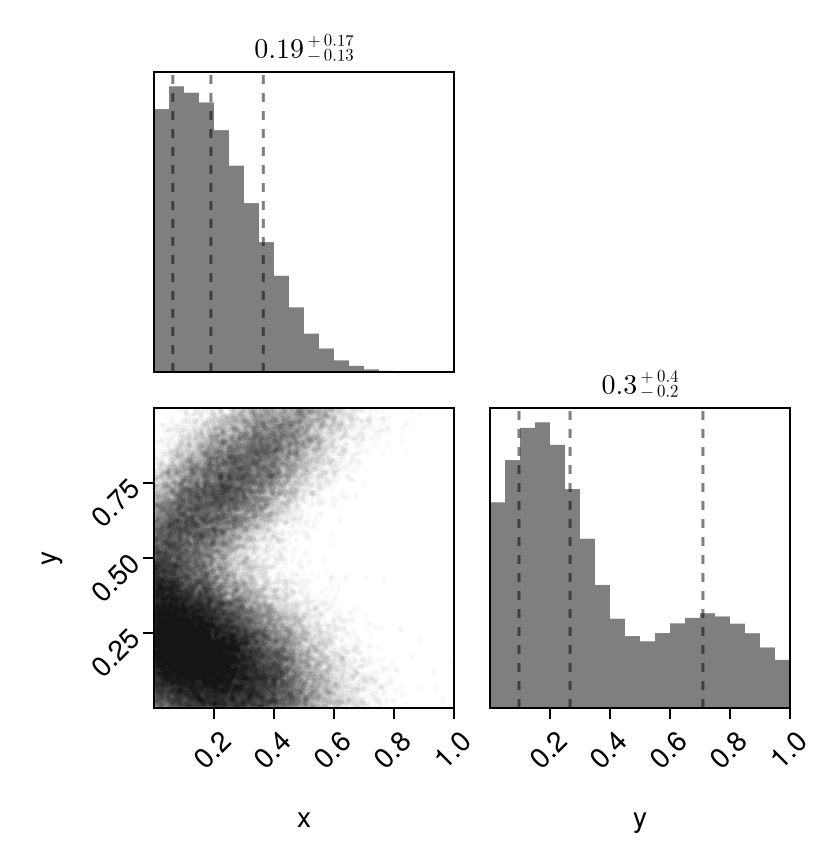

In [106]:
using TruncatedGaussianMixtures
using DataFrames, Distributions, CairoMakie, PairPlots

# Lets generate some variables
a = [0.0, 0.0]; b = [1.0, 1.0] # Lower and upper limits of the bounding box

# Generate a mixture of truncated gaussian mixtures
μ1 = [0.2, 0.7]; 
Σ1 = [0.05 0.04;0.04 0.05];

μ2 = [0.1, 0.2]; 
Σ2 = [0.05 -0.02;-0.02 0.03];

dist = MixtureModel(
    [TruncatedMvNormal(MvNormal(μ1, Σ1), a, b), 
     TruncatedMvNormal(MvNormal(μ2, Σ2), a, b)],
    [0.3, 0.7]
)

df = DataFrame(rand(dist, 80_000)', [:x, :y])

pairplot(df => (PairPlots.MarginHist(),PairPlots.Scatter(markersize=4, alpha=0.05), PairPlots.MarginConfidenceLimits()))

Lets fit this data to a TGMM with two components. `cov` can either be `:diag` for diagonal covariance matrices, or `full` for general covariance matrices. Since we have allowed correlations in the TGMM components above, we will use that.

In [121]:
gmm = fit_gmm(df, 2, a, b; cov=:full, tol=1e-5, progress=true);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


The `tol` keyword sets the stopping criteria of the EM algorithm (one can play with this), and `progress` will allow one to see a progress bar. 

Since the `gmm` object we output is simply a `Distributions.jl` object, we can just use `rand` and generate samples we need from it. 

In [ ]:
df_fit = DataFrame(rand(gmm, 80_000)', [:x, :y]);

Now let us see how well we fit the distribution.

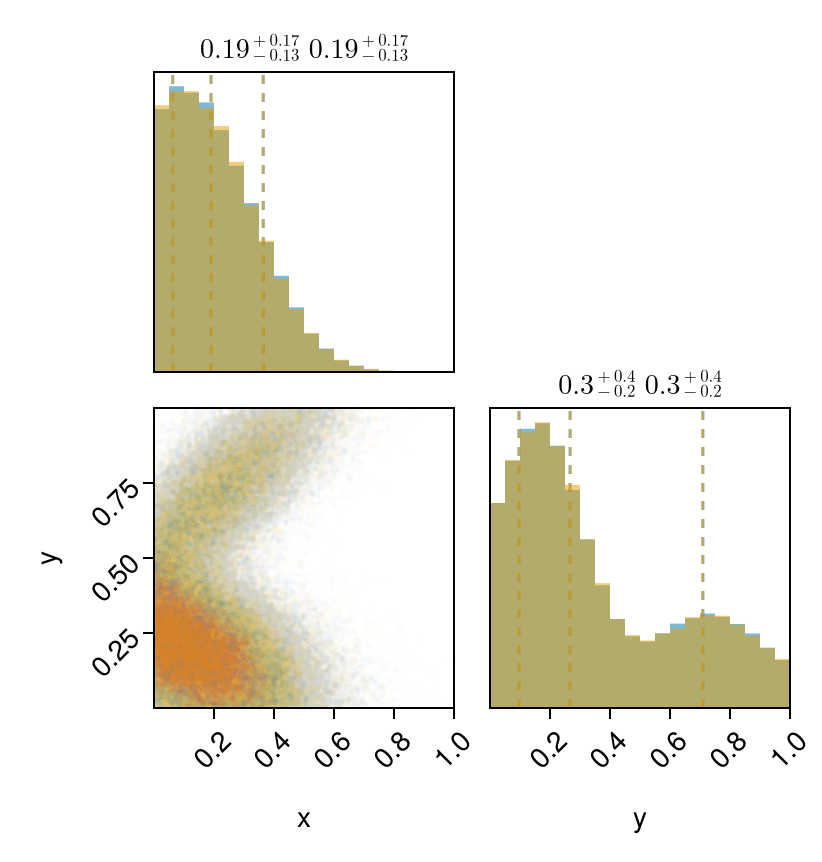

In [122]:
pairplot(
    df => (PairPlots.MarginHist(),PairPlots.Scatter(markersize=4, alpha=0.03), PairPlots.MarginConfidenceLimits()),
    df_fit => (PairPlots.MarginHist(),PairPlots.Scatter(markersize=4, alpha=0.03), PairPlots.MarginConfidenceLimits())
)

Looks good to me!